In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device=device)

class ImageTextDataset(Dataset):
    def __init__(self, images, texts, transform=None):
        self.images = images
        self.texts = texts

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # load image
        image = Image.open(self.images[idx])
        image = preprocess(image)
        text = clip.tokenize([self.texts[idx]])[0]
        return image, text

In [50]:
import os
image_dir = '/ssd1/holdenhu/Amazon_dataset/Amazon_Fashion/small_image/'
images = []
image_paths = []
for filename in os.listdir(image_dir):
    img_path = os.path.join(image_dir, filename)
    img = Image.open(img_path).convert('RGB')
    images.append(img)
    image_paths.append(img_path)
    
image_files = image_paths[:3]
text_data = ["a cat is sitting on a sofa", "a dog is running in the park", "a person is riding a bike"]
dataset = ImageTextDataset(image_files, text_data)
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
_=next(iter(dataloader))

IndexError: list index out of range

In [30]:
# iterate over batches
for batch in dataloader:
    # do something with batch
    images, texts = batch
    images = images.to('cuda')
    texts = texts.to('cuda')
    # encode image
    with torch.no_grad():
        image_features = model.encode_image(images).float()

    # encode text
    with torch.no_grad():
        text_features = model.encode_text(texts).float()

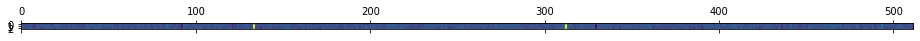

In [41]:
import matplotlib.pyplot as plt
import numpy as np
plt.matshow(text_features.cpu())
plt.show()

In [56]:
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
image_features = image_features.cpu().numpy()
text_features = text_features.cpu().numpy()

# New Image Extractor Code

In [59]:
import numpy as np
from sklearn.decomposition import IncrementalPCA

# 加载特征数组
# features_array = np.load('features.npy')

# 指定降维后的维数
n_components = 2

# 创建增量PCA对象，并指定batch_size和n_components参数
batch_size = 512
ipca = IncrementalPCA(n_components=n_components, batch_size=batch_size)

# 逐批次对特征数组进行降维
for epoch in range(3):
    for i in range(0, len(image_features), batch_size):
        batch = image_features[i:i+batch_size]
        ipca.partial_fit(batch)

# 对所有特征进行降维
features_reduced = ipca.transform(image_features)

# 保存降维后的特征数组
# np.save('features_reduced.npy', features_reduced)

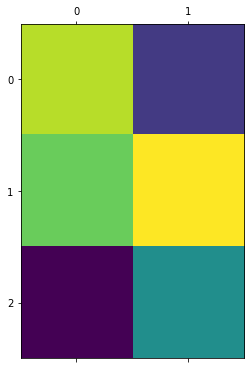

In [61]:
import matplotlib.pyplot as plt
import numpy as np
plt.matshow(features_reduced)
plt.show()

In [10]:
import numpy as np
_ = np.load('/ssd1/holdenhu/Amazon_dataset/Amazon_Fashion/preprocessed/image/resnet/asin_image_feature128_kmeans_c20_k1_dict.npy',allow_pickle=True)
# image_path_list = np.load('/ssd1/holdenhu/Amazon_dataset/Amazon_Fashion/preprocessed/image/resnet/raw-feature-image-path.npy')

In [12]:
b = dict(_.tolist())

In [13]:
b['B00I9MNLZM']

[5]

In [18]:
asin_list = [i.split('/')[-1][:-4] for i in image_path_list]
asin_list

['B00I9MNLZM',
 'B01CXU9B90',
 'B00W731N0Y',
 'B016JCZ4I0',
 'B018I39ABK',
 'B015HN9DRU',
 'B00QB0XWNU',
 'B00SDLQD40',
 'B00GVGM91K',
 'B00XU0RJBK',
 'B01ET4P0IO',
 'B00KCM1W08',
 'B01A0UC9J4',
 'B01FF8VKSC',
 'B01GLOYHMA',
 'B00DCZVET6',
 'B014134QK6',
 'B017F05X3Q',
 'B00KGLY9A0',
 'B01H4595VI',
 'B00UBUTHVW',
 'B01CQPF4I4',
 'B017XI8HX8',
 'B01CA5YY72',
 'B0159BW9XU',
 'B00L41JURI',
 'B01HCRZ37I',
 'B00LVVJ8QY',
 'B00K0O7GHG',
 'B019Q6D8J8',
 'B00YTZ16KA',
 'B00ZHGG2AY',
 'B01632NEN8',
 'B00LEY5STE',
 'B00Q2AJAW6',
 'B01CCI6B7S',
 'B01FBKY01I',
 'B00EAQHTPO',
 'B01DDFSIQQ',
 'B01AEY19X8',
 'B01FUBNPDM',
 'B01DZUNZXA',
 'B00OH1IKT6',
 'B01E5C6P9I',
 'B00QN6VY2S',
 'B00GJVIWV8',
 'B01H7MZ0UI',
 'B00ZAQ3QRS',
 'B01APFCDT0',
 'B00UAVKXZG',
 'B005DAHOLU',
 'B00OYCHEMM',
 'B00ENTQOUY',
 'B01FSUOK66',
 'B016RF83QE',
 'B017CIN1U8',
 'B00K5AP43S',
 'B01C75O60A',
 'B01GHBFUPU',
 'B016U98FJW',
 'B0171WB85K',
 'B00844NQGE',
 'B00ELJWMYS',
 'B00VQZTXVA',
 'B0184O7DIU',
 'B00NWIFX5E',
 'B00XIYXZ

In [ ]:
__ = pickle.load(open('/ssd1/holdenhu/Amazon_dataset/Amazon_Fashion/preprocessed/image/resnet/asin-image-features.pickle', 'rb'))

(1000, 128)
STARTED CLUSTERING
[ 7  6 11 13  9 19  7  4 17 15 16  0 10 13  3 13  7  8 10 10  4  6 15 13
 15 13  6 19 11  8 17 14 15 16  1 16  3 11 10  6  6 10  5  2  1 13 10 10
 10 19  5  2 11  3 17 17 19  5  9  2  1  6 10 10 11 16 14  7  3  3  2 11
  1 15  2 11  6  1  5 17  7  4  0  5 12  9 18  2  2  5  8  5 13 16 16 10
  7  7  1 17  7 12 11 14  3 11  8  6 15 10 17 12  5 17 15  2  2 15  6  1
  1 10 10  2  9 10 10  4  5  2 19 11  4  7  6  4  5  9  1  0 11  4  6 16
 15  6 16 14  6  2  1  2 10  4  7 10 15 11  0  0 10  6 11 19 11  6 12 15
 10 19 11  9  5 14 16  6 10 12  4 11 12 13 17  9 16 10 13  1  9 15  4 15
  8 19 13 13 12  1 10  3  1 16 10  0  5  4  6 13 10  1  6  2 13 19 10 17
 10 12 13  6  7 14  3 11  6  9 13  1  0  7 19  1  7 14 17  1  5  4  1  7
 11 15  3  5 16 17  1  2  7  7  6  9 15 16 18 10  5  8  4  1 17 19 11  6
 11  1 11 13  5 17  2 15  1  3  2  7  2 17 13  7  9  0  6  9 13  6  7  2
  5 17 12  4 14  4 13 19  8 10  7 17  1 16  8 13  5  7 11 10  9 15  4  7
 10  1 13  6  7  8 1

IndexError: list index out of range

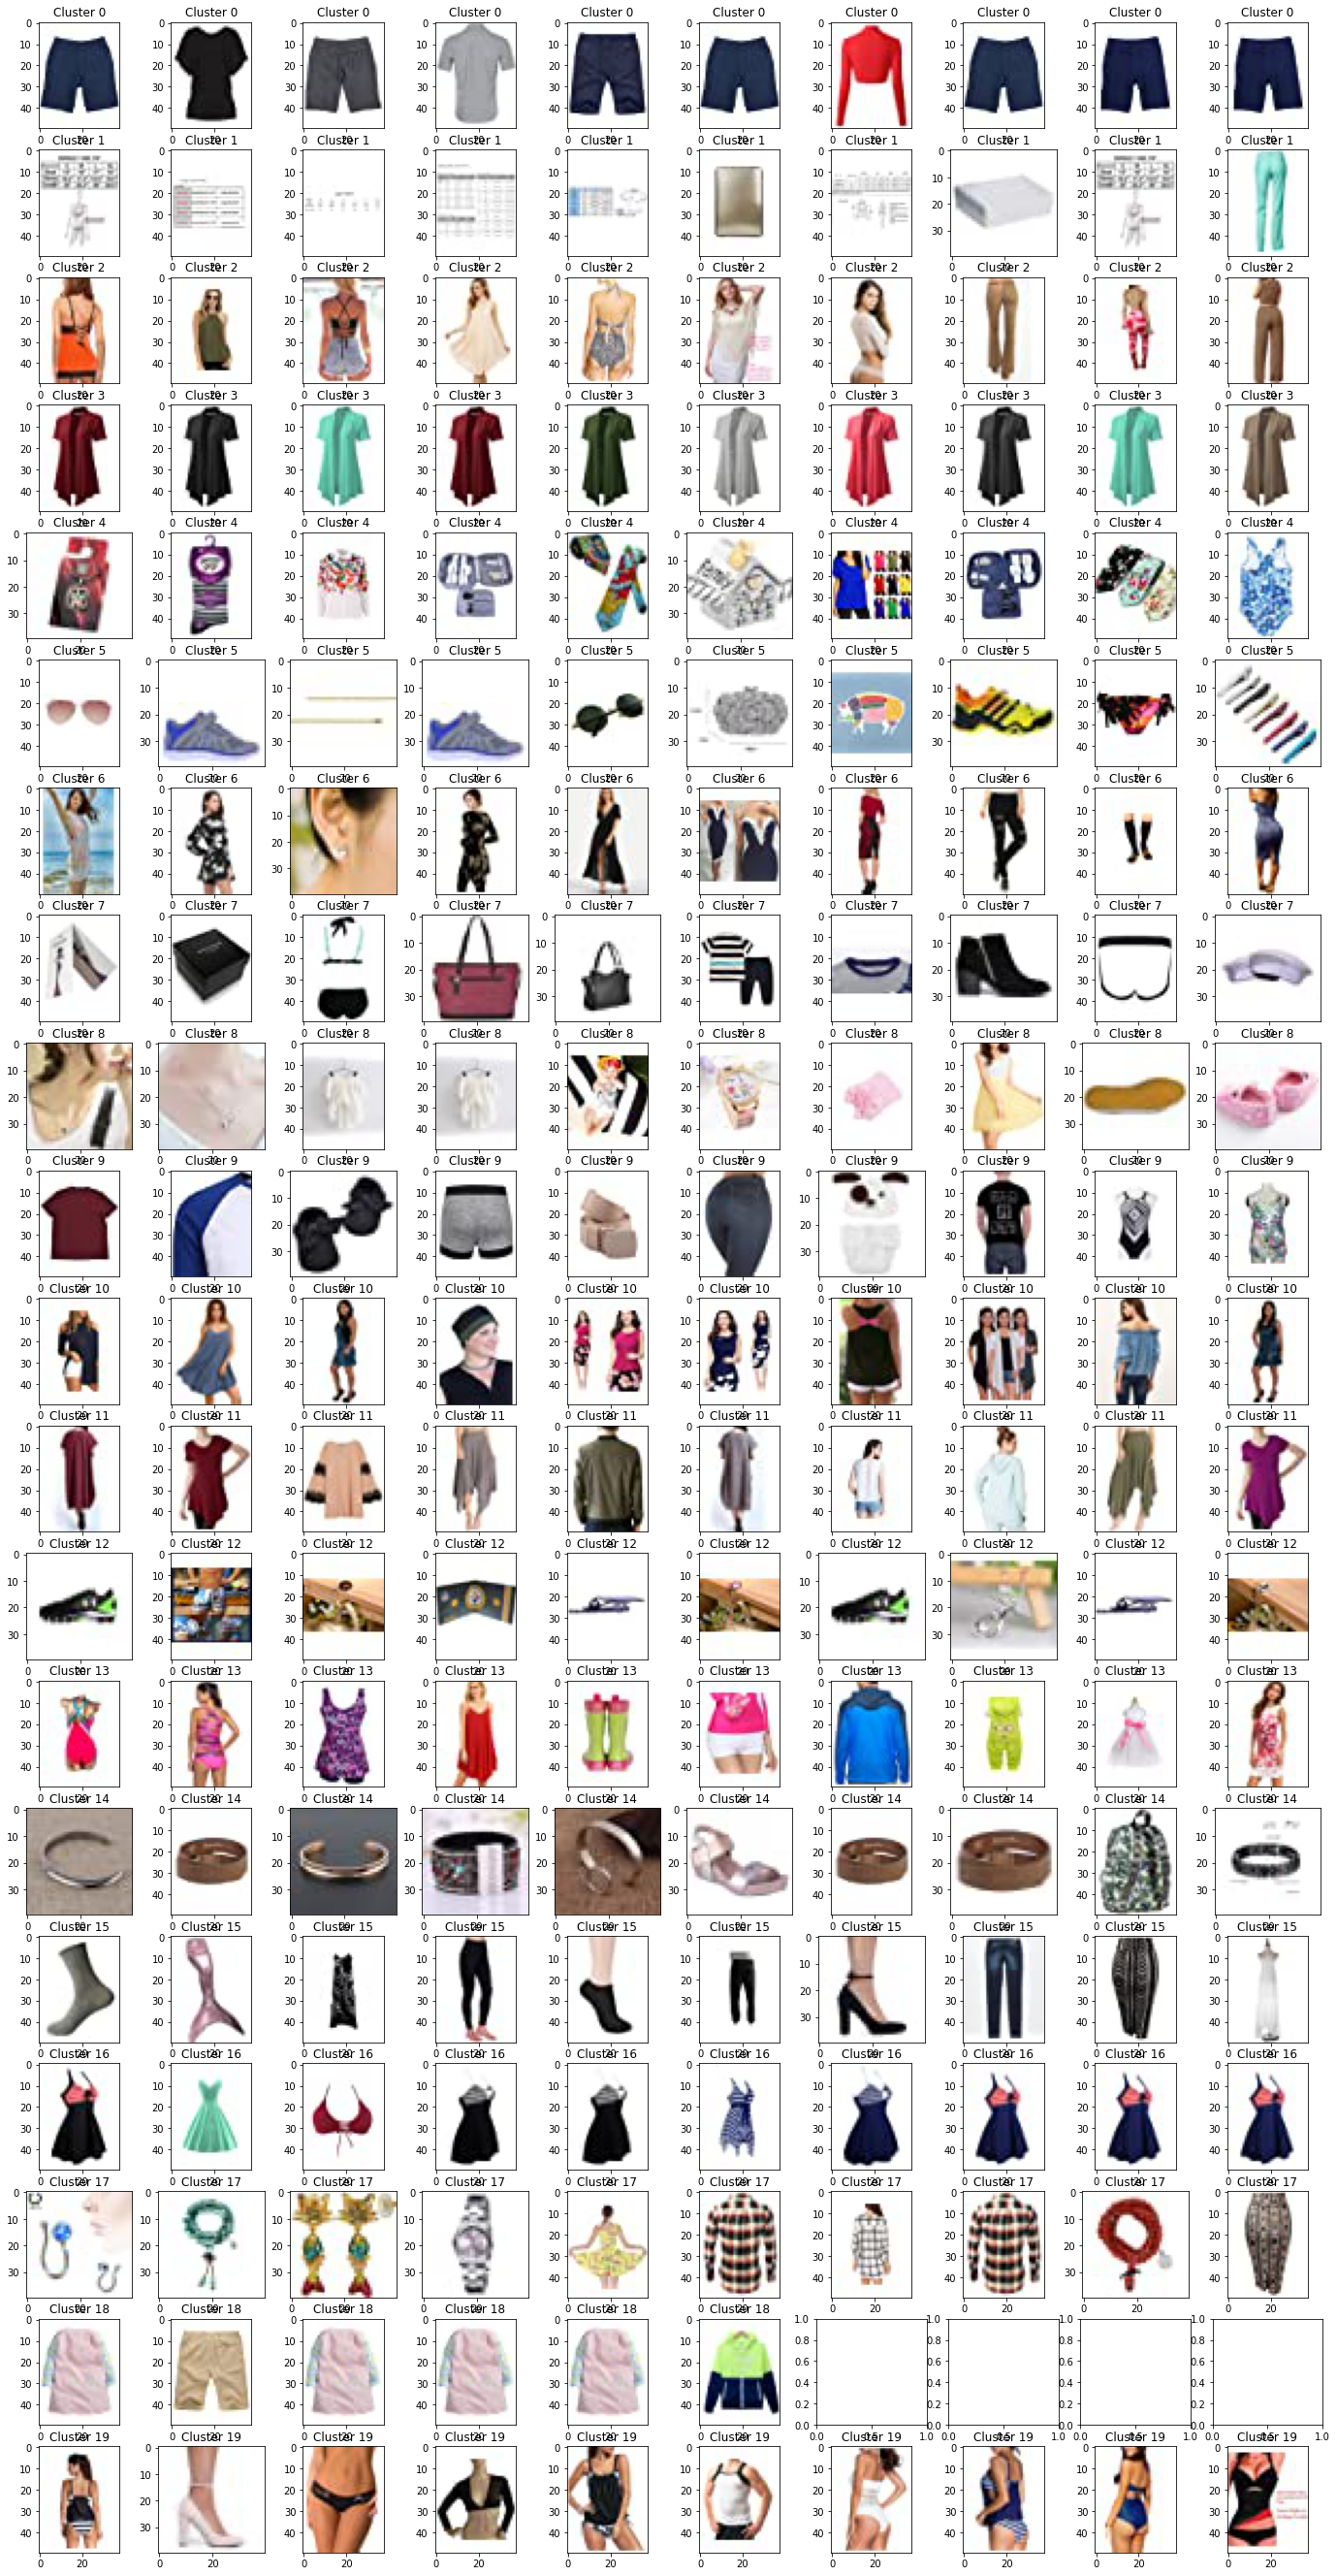

In [48]:
def cluster_images(image_feature_list, image_path_list, cluster_num=1):
    # image_feature_list = np.array(image_feature_list)
    print(image_feature_list.shape)
    img_feature_embedding = image_feature_list
    # pca = PCA(n_components=18)
    # img_feature_embedding = pca.fit_transform(image_feature_list)
    # print(img_feature_embedding.shape)

    print('STARTED CLUSTERING')
    number_clusters = cluster_num
    kmeans = KMeans(n_clusters=number_clusters, random_state=0).fit(np.array(img_feature_embedding))
    print(kmeans.labels_)

    image_cluster_dict = {}
    for i, m in enumerate(kmeans.labels_):
        image_cluster_dict[f'{m}'] = []

    print('CLUSTER GROUPS')
    for i, m in enumerate(kmeans.labels_):
        image_cluster_dict[f'{m}'].append(image_path_list[i])

    f, axarr = plt.subplots(cluster_num,10, figsize=(24, int(cluster_num*2.4)))
    for i in image_cluster_dict.keys():
        for j in range(10):
            im = Image.open(image_cluster_dict[i][j])
            axarr[int(i), j].imshow(np.array(im))
            axarr[int(i), j].set_title(f'Cluster {i}')
    plt.show()
    return image_cluster_dict, kmeans
    
image_cluster_dict, kmeans = cluster_images(features_reduced, image_paths, cluster_num=20)
label = kmeans.labels_